In [337]:
import pandas as pd
import numpy as np
df = pd.read_excel('heroes_information.xlsx')
print(df)
veriler = pd.read_excel('heroes_information.xlsx')
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show

      no             name  Gender Eye color               Race  \
0      0           A-Bomb    Male    yellow              Human   
1      1       Abe Sapien    Male      blue      Icthyo Sapien   
2      2         Abin Sur    Male      blue            Ungaran   
3      3      Abomination    Male     green  Human / Radiation   
4      5    Absorbing Man    Male      blue              Human   
..   ...              ...     ...       ...                ...   
464  728     Yellowjacket    Male      blue              Human   
465  729  Yellowjacket II  Female      blue              Human   
466  731             Yoda    Male     brown     Yoda's species   
467  732          Zatanna  Female      blue              Human   
468  733             Zoom    Male       red                  -   

           Hair color  Height          Publisher Skin color Alignment  Weight  \
0             No Hair     203      Marvel Comics          -      good     441   
1             No Hair     191  Dark Horse Com

#### Problem 1: Weight Analysis by Alignment

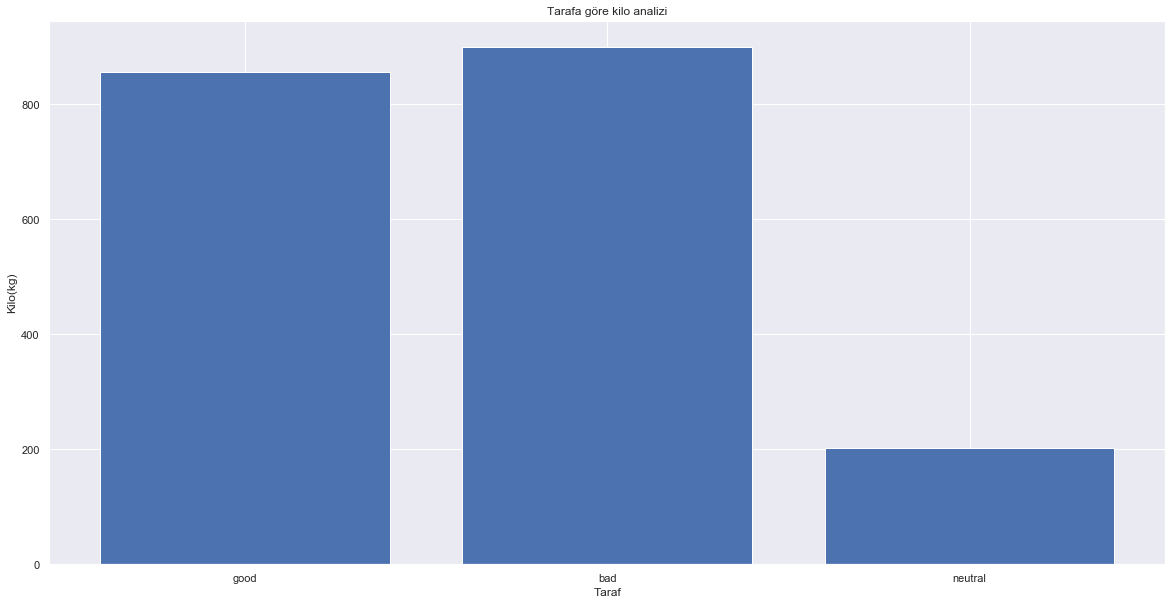

In [326]:
plt.figure(figsize=(20,10))
plt.bar(veriler["Alignment"], veriler["Weight"].sort_values())
plt.title("Tarafa göre kilo analizi")
plt.xlabel("Taraf")
plt.ylabel("Kilo(kg)")
plt.show()

#### Problem 2: Percentage of Eye Colors

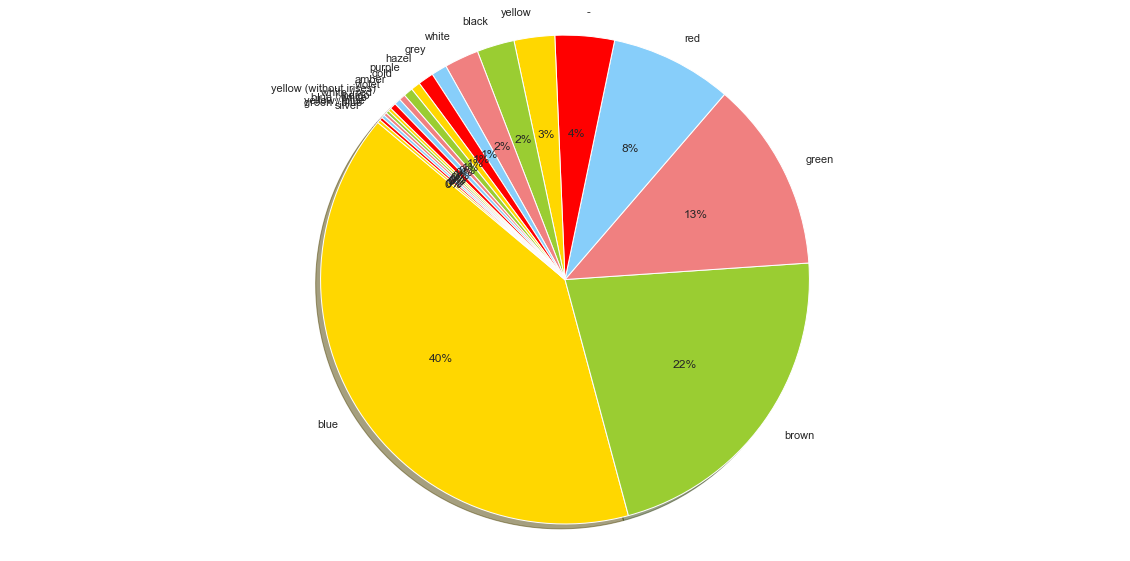

In [331]:
sizes =sort_by_ec['Eye color'].value_counts(sort=True, ascending=False)
labels=sort_by_ec['Eye color'].value_counts(sort=True, ascending=False)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.figure(figsize=(20,10))
plt.pie(sizes,labels=sizes.index.values, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#### Problem 3: Average Body Mass Index of Superheros by Gender

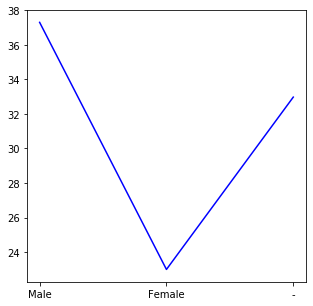

In [218]:
df_mean_by_gender=df.groupby(['Gender']).mean()
dfgender=df['Gender'].unique()

plt.figure(figsize=(5,5))
plt.plot(dfgender,df_mean_by_gender['VKI'],color='blue')

plt.show()


#### Problem 4: Average Power Numbers by Gender

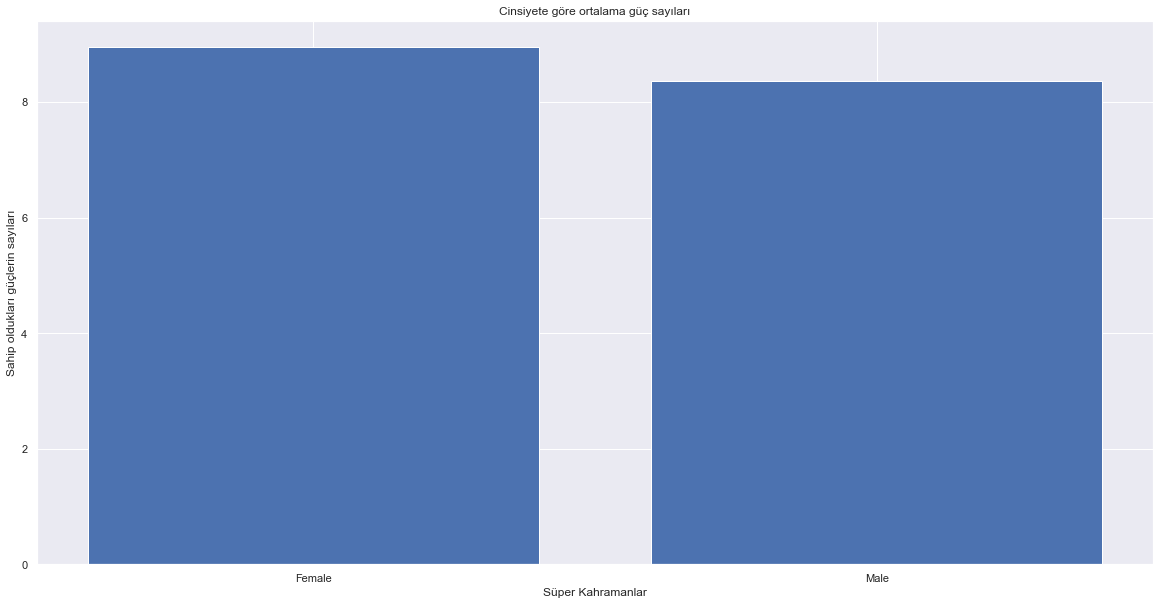

In [329]:
veriler_avg = veriler.groupby('Gender').Truecounter.mean()

veriler_avg = veriler_avg.to_frame()
veriler_avg = veriler_avg.reset_index()
Name = veriler_avg['Gender'].tolist()
Truecounter = veriler_avg['Truecounter'].tolist()

plt.figure(figsize=(20,10))
plt.bar(Name,Truecounter)
plt.title("Cinsiyete göre ortalama güç sayıları")
plt.xlabel("Süper Kahramanlar")
plt.ylabel("Sahip oldukları güçlerin sayıları")
plt.show()

#### Problem 5: Height Analysis by Publisher

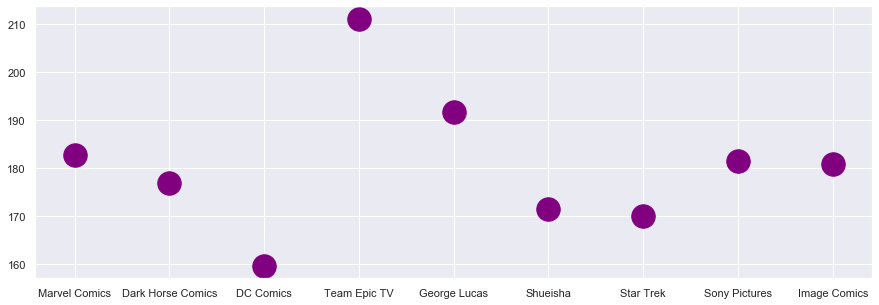

In [332]:
df_mean_by_publisher=df.groupby(['Publisher']).mean()
dfpublisher=df['Publisher'].unique()
plt.figure(figsize=(15,5))
plt.scatter(dfpublisher,df_mean_by_publisher['Height'],s=550,color='purple')
plt.show()

#### Problem 6: Body Mass Index and Power Numbers Relation(Seaborn)

<Figure size 1080x288 with 0 Axes>

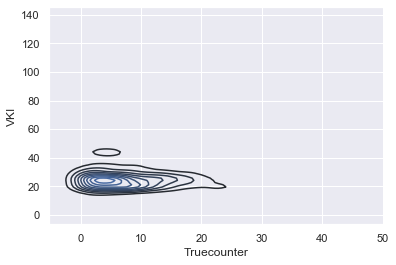

<Figure size 1080x288 with 0 Axes>

In [325]:
sns.kdeplot(df['Truecounter'], df['VKI'])
plt.figure(figsize=(15,4))

#### Problem 7: Superheros Power Counts(Only Dark Horse Comics's Superheros)

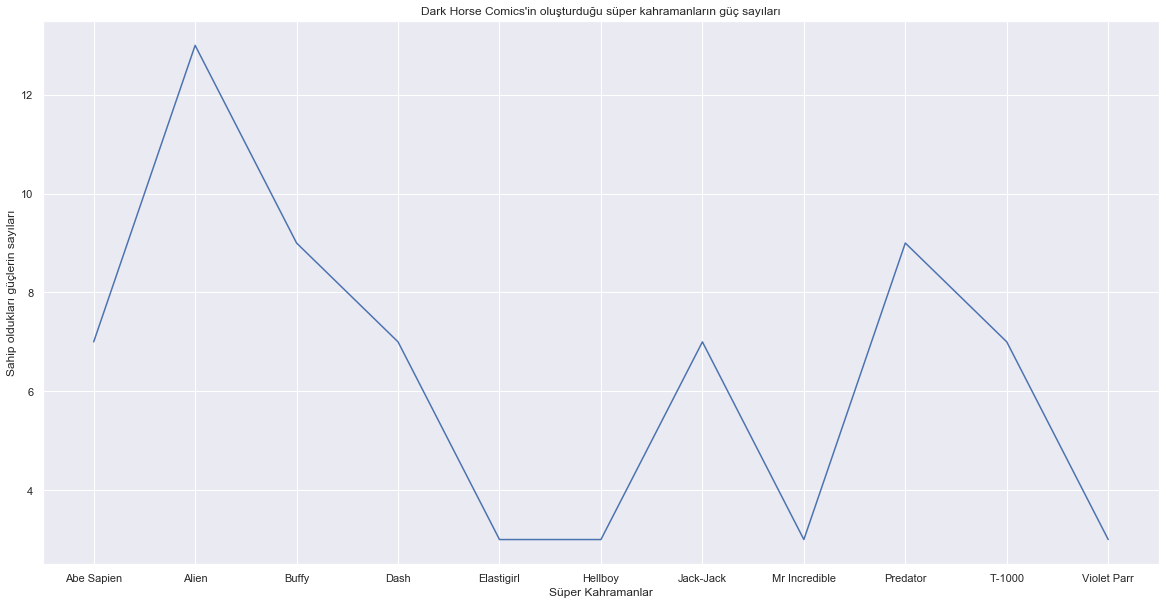

In [333]:
veriler_avg = veriler[(veriler.Publisher == 'Dark Horse Comics')].groupby('name').Truecounter.mean()
veriler_avg = veriler_avg.to_frame()
veriler_avg = veriler_avg.reset_index()
Name = veriler_avg['name'].tolist()
Truecounter = veriler_avg['Truecounter'].tolist()
plt.figure(figsize=(20,10))
plt.plot(Name,Truecounter)
plt.title("Dark Horse Comics'in oluşturduğu süper kahramanların güç sayıları")
plt.xlabel("Süper Kahramanlar")
plt.ylabel("Sahip oldukları güçlerin sayıları")
plt.show()

#### Problem 8: Relation of Height and  Power Nums(Seaborn)

<Figure size 1080x1152 with 0 Axes>

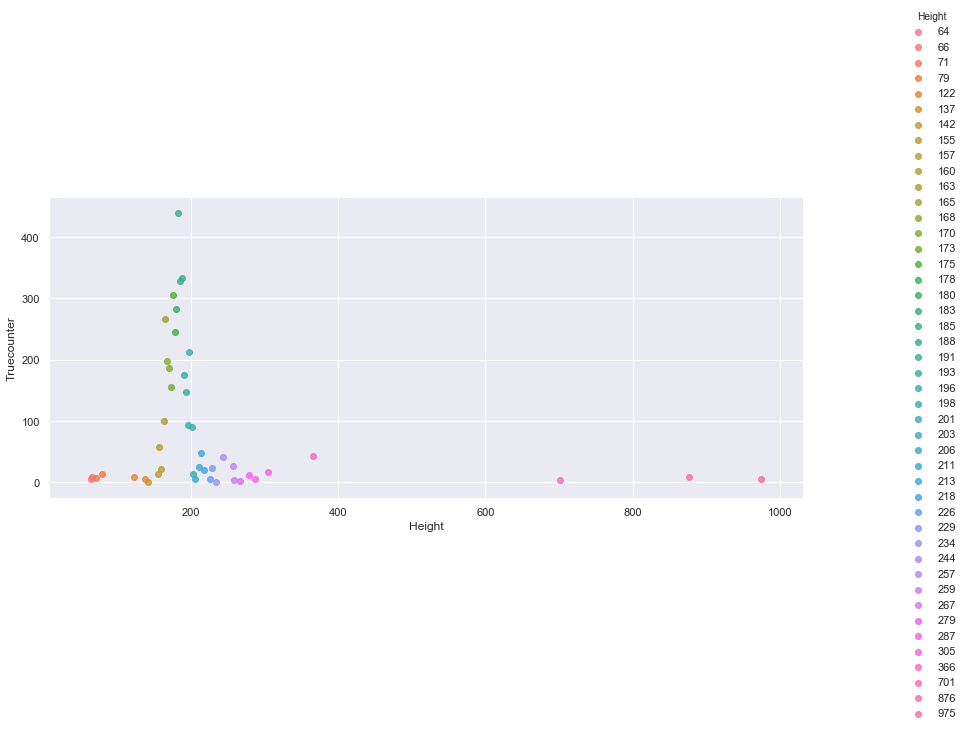

In [317]:
df_mean_by_true=df.groupby(['Height']).sum()
dfname=df['Truecounter'].unique()
df_mean_by_true=df_mean_by_true.reset_index()
plt.figure(figsize=(15,16))
g=sns.lmplot(x='Height', y='Truecounter', data=df_mean_by_true,fit_reg=False, hue='Height')
g.fig.set_figwidth(15)
g.fig.set_figheight(5)

#### Problem 9: Percentage of Publishers by Superhero numbers

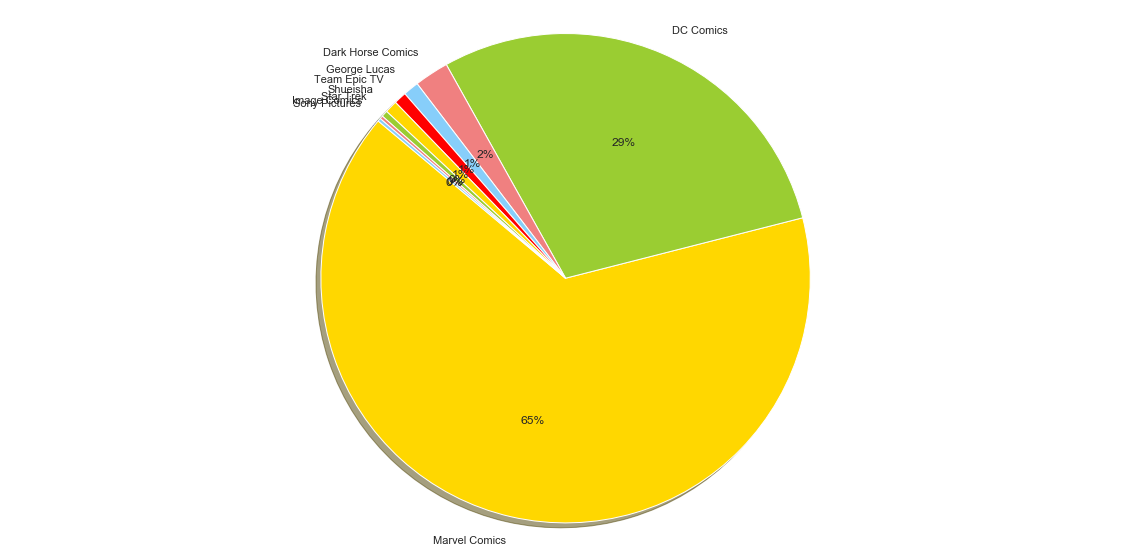

In [327]:
sizes =sort_by_ec['Publisher'].value_counts(sort=True, ascending=False)
labels=sort_by_ec['Publisher'].value_counts(sort=True, ascending=False)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.figure(figsize=(20,10))
plt.pie(sizes,labels=sizes.index.values, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#### Problem 10: Relation between Height and Power Numbers (Only for Dark Horse Comics) (Bokeh)

In [350]:
boy = df[(df.Publisher == 'Dark Horse Comics')].groupby('Height').Truecounter.mean().to_frame().reset_index()
x = boy['Height'].tolist()
y = boy['Truecounter'].tolist()

fig = figure(title="Dark Horse Comics'in oluşturduğu Süper Kahramanların Güç Sayıları ve Kiloları Arasındaki İlişki", x_axis_label='Height', y_axis_label='Truecounter')

fig.line(x=x, y=y, line_width=6, line_color="grey")

show(fig)